# Machine Learning on Python - Naive Bayes 2

Welcome to the second notebook on Naive Bayes. In the first notebook, we talked about the mathematical details of Naive Bayes and went through briefly how to use the algorithm on Python. In this notebook, we will be practicing the algorithm with two small projects.

# Text Classification with Naive Bayes

## Spam Classification

Above, I used all the Naive Bayes alternatives for the classification of the Iris Setosa dataset. All of these algorithms are proposed for different types of data, before applying any of the Naive Bayes alternatives explanatory data analysis could help a lot to choose which algorithm can be used. As an example, I will be constructing a spam detector here. Naive Bayes is highly used for text classification, moreover, some of the versions of the algorithm were mainly developed for text classification such as Complement Naive Bayes.

Let's get started.

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import ComplementNB,BernoulliNB,MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,f1_score
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
sns.set_theme()

Getting the data and importing some utility functions:

In [2]:
spam = fetch_openml('spambase', version=1, as_frame=True)

X = spam["data"]
y = pd.DataFrame(spam["target"])

The code below ( `plot_confusion()` and `plot_precisionvsrecall()`) is taken from my previous notebooks:

In [3]:
def plot_confusion(y,y_pred):
    if isinstance(y_pred, (np.ndarray)):
        plt.figure(figsize=(10, 7))
        cm=confusion_matrix(y, y_pred)
        
        plt.figure(figsize=(10, 7))
        group_names =['TN','FS','FN','TP']
        
        group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
        group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

        labels = [f'{v1}\n\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
    
        sns.heatmap(cm, annot=labels, fmt='', cmap='mako',annot_kws={"fontsize":20})

    else:
        
        f, axes = plt.subplots(1, 3,figsize=(18,5))
        for i in range(3):
            cm=confusion_matrix(y, y_pred[i])
            plt.figure(figsize=(10, 7))
            group_names =['TN','FS','FN','TP']
            group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
            group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
            labels = [f'{v1}\n\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
            labels = np.asarray(labels).reshape(2,2)
            sns.heatmap(cm, annot=labels, fmt='', cmap='mako',annot_kws={"fontsize":20},ax=axes[i])
            
def plot_precisionvsrecall(y,y_pred):
    if isinstance(y_pred, (np.ndarray)):
        plt.figure(figsize=(10, 7))
        precisions, recalls, thresholds = precision_recall_curve(y, y_pred)
        sns.set_style("darkgrid")
        ax=sns.lineplot(x=precisions, y=recalls ,linewidth = 2)
        ax.set_xlabel("Precision",fontsize=15)
        ax.set_ylabel("Recall",fontsize=15)
        ax.text(0.7 * (0.25 + 0.25+ 0.5), 0.80 * (0.25 + 0.25+ 0.5), 'AUC=%.3f' % auc(recalls, precisions),size=14)
        ax.text(0.5 * (0.25 + 0.25+ 0.5), 0.40 * (0.25 + 0.25+ 0.5), 'F1-Score =%.3f' % f1_score(y, y_pred),size=14)
        
    else: 
        f, axes = plt.subplots(1, 3,figsize=(17,5))
        for i in range(3):
            precisions, recalls, thresholds = precision_recall_curve(y, y_pred[i])
            sns.set_style("darkgrid")
            ax=sns.lineplot(x=precisions, y=recalls ,ax=axes[i],linewidth = 2)
            ax.set_xlabel("Precision",fontsize=15)
            ax.set_ylabel("Recall",fontsize=15)
            ax.text(0.7 * (0.25 + 0.25+ 0.5), 0.80 * (0.25 + 0.25+ 0.5), 'AUC=%.3f' % auc(recalls, precisions),size=14)
            ax.text(0.5 * (0.25 + 0.25+ 0.5), 0.40 * (0.25 + 0.25+ 0.5), 'F1-Score =%.3f' % f1_score(y, y_pred[i]),size=14)


def plot_counts(positive):
    cnt = Counter()
    if positive:
        for text in imdb_data[imdb_data['sentiment']==1]['review'].values:
            for word in text.split():
                cnt[word]+=1
        cnt.most_common(10)
        frequent = pd.DataFrame(cnt.most_common(10))
        frequent.columns=['word', 'count']
        title="Most Frequent Words for Positive Sentiments"
    else:
        for text in imdb_data[imdb_data['sentiment']==0]['review'].values:
            for word in text.split():
                cnt[word]+=1
        cnt.most_common(10)
        frequent = pd.DataFrame(cnt.most_common(10))
        frequent.columns=['word', 'count']
        title="Most Frequent Words for Negative Sentiments"
    
    
    plt.figure(figsize=(15, 7))
    plt.title(title,fontsize=18)
    ax=sns.barplot(x=frequent["count"], y=frequent["word"], palette="Spectral")
    ax.set_xlabel("Count",fontsize=15)
    ax.set_ylabel("Word",fontsize=15)

###  1. Exploratory Data Analysis

Firstly, let's do a quick exploratory data analysis to have a basic understanding of the data.

In [4]:
print(spam.DESCR) 

**Author**: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt    
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/spambase)   
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

SPAM E-mail Database  
The "spam" concept is diverse: advertisements for products/websites, make money fast schemes, chain letters, pornography... Our collection of spam e-mails came from our postmaster and individuals who had filed spam.  Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam.  These are useful when constructing a personalized spam filter.  One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.
 
For background on spam:  
Cranor, Lorrie F., LaMacchia, Brian A.  Spam! Communications of the ACM, 41(8):74-83, 1998.  

### Attribute Information:  
The last column denotes

In [5]:
# Display firt five rows
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0


In [6]:
X.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


C:\Users\gorke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

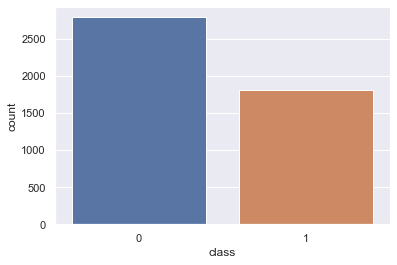

In [7]:
sns.countplot(y["class"]) #checking if there is class imbalance

In [8]:
y["class"]=pd.to_numeric(y["class"])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42,stratify=y)

The dataset is provided ready for training, we do not need to tokenize or encode anything. Let's train `MultinomialNB()`,`ComplementNB()` and `BernoulliNB()` models to predict spams.

In [10]:
mnb=MultinomialNB()
cnb=ComplementNB()
bnb = BernoulliNB()

In [11]:
model_mnb=mnb.fit(X_train,y_train)

In [12]:
model_cnb=cnb.fit(X_train,y_train)

In [13]:
model_bnb=bnb.fit(X_train,y_train)

Let's get predictions.

In [14]:
mnb_predict=mnb.predict(X_test)
cnb_predict=cnb.predict(X_test)
bnb_predict=bnb.predict(X_test)

### Performance of Models

Let's firstly see accuracy scores of the trained models:

In [15]:
print('MultinomialNB accuracy score: {0:0.4f}'. format(accuracy_score(y_test, mnb_predict)))
print('ComplementNB accuracy score: {0:0.4f}'. format(accuracy_score(y_test, cnb_predict)))
print('BernoulliNB accuracy score: {0:0.4f}'. format(accuracy_score(y_test, bnb_predict)))


MultinomialNB accuracy score: 0.7763
ComplementNB accuracy score: 0.7785
BernoulliNB accuracy score: 0.8762


Looks like Bernoulli Naive Bayes performs better on this dataset. However, accuracy may be a deceive metric. Let's also plot the confusion matrix and ROC Curve to examine performance further.

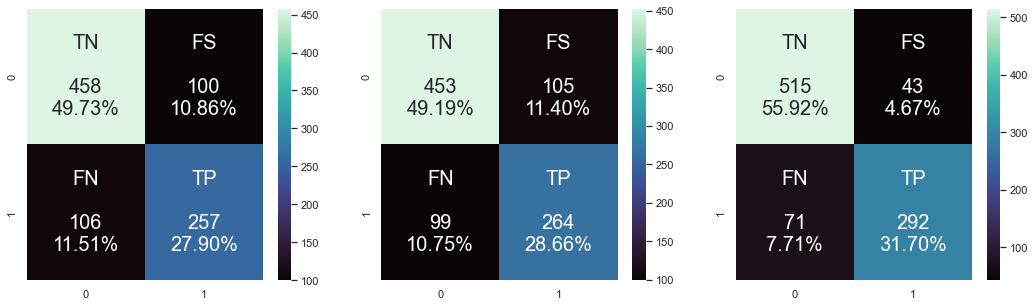

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [16]:
plot_confusion(y_test, [mnb_predict,cnb_predict,bnb_predict])

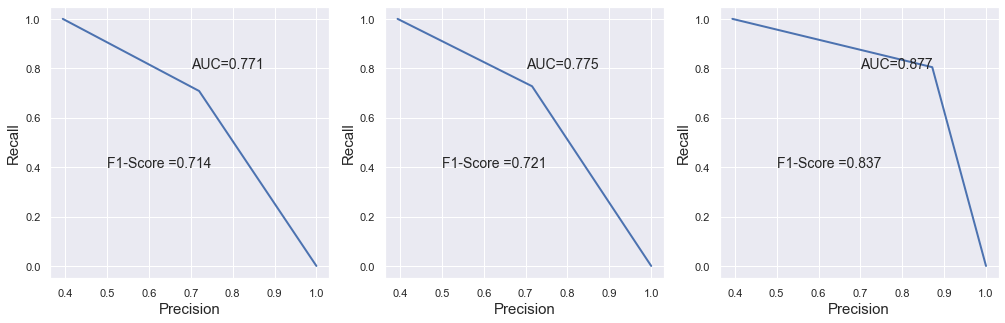

In [17]:
plot_precisionvsrecall(y_test, [mnb_predict,cnb_predict,bnb_predict])

It looks like `BernoulliNB()` clearly outperforms other two model. As we did in Logistic Regression notebooks, we can play around the prediction with `predict_proba()` and perhaps slightly increase prediction performance.

In [18]:
predict=(bnb.predict_proba(X_test)[:,1] >= 0.30)

In [19]:
print('MultinomialNB accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predict.astype(int))))

MultinomialNB accuracy score: 0.8817


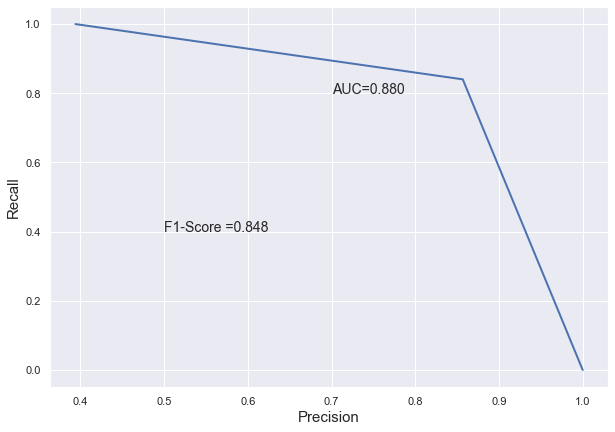

In [20]:
plot_precisionvsrecall(y_test, predict)

# IMDB Movie Review Classification

Now we will use another dataset. This time we will need to do some preprocessing before using the algorithm. The dataset is avaliable on [link](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [21]:
nltk.download("omw-1.4")
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gorke\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gorke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gorke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
imdb_data=pd.read_csv('IMDB Dataset.csv')

In [23]:
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


The dataset includes the reviews written by viewers as well as corresponding sentiments. There are some HTML markers in the text that we need to get rid of, in addition, we also need to tokenize the reviews. Let's get started with this preprocessing stuff.

## Preprocessing the Dataset

First of all, let's start off by getting rid of some of the noise and HTML markers.

In [24]:
def denoise(text):
    soup = BeautifulSoup(text, "html.parser").get_text()
    ch_removed = re.sub('\[[^]]*\]', '', soup)
    ch_removed= re.sub(r'[^a-zA-z0-9\s]','',ch_removed)
    lowered=ch_removed.lower()
    return lowered

In [25]:
imdb_data['review']=imdb_data['review'].apply(denoise)

C:\Users\gorke\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [26]:
imdb_data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


We got rid of unnecessary characters and HTML markers. Now I will apply lemmatization to the text. Lemmatization is a process of converting a word to its base.  There is a very similar process named stemming which is often confused with lemmatization. I recommend reading this article about the differences between stemming and lemmatization: [link](https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/#:~:text=Stemming%20is%20a%20process%20that,'%20would%20return%20'Car'.)

I will use `WordNetLemmatizer()` for lemmatizing the reviews.

In [27]:
wordnet_lem = WordNetLemmatizer()

In [28]:
imdb_data['review']=imdb_data['review'].apply(wordnet_lem.lemmatize)

Stopwords are generally insignificant for prediction purposes, therefore let's also get rid of them as well.

In [29]:
stop_words = stopwords.words()

In [30]:
imdb_data['review'] = imdb_data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

Lastly, let's convert sentiments to a numeric feature.

In [31]:
imdb_data['sentiment'] = [0 if each == "negative" else 1 for each in imdb_data['sentiment']]
imdb_data['sentiment']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

## Visualizing the Filtered Results

We are done with preprocessing. Before training, let's do some visualization using filtered results. I will create two word clouds: one for positive sentiments and the other for negative sentiments. Then I will use `sns.barplot()` for plotting the most frequent 10 words.

In [32]:
def create_cloud(text):
    wordcloud = WordCloud( background_color="white").generate(text)
    plt.figure( figsize=(18,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

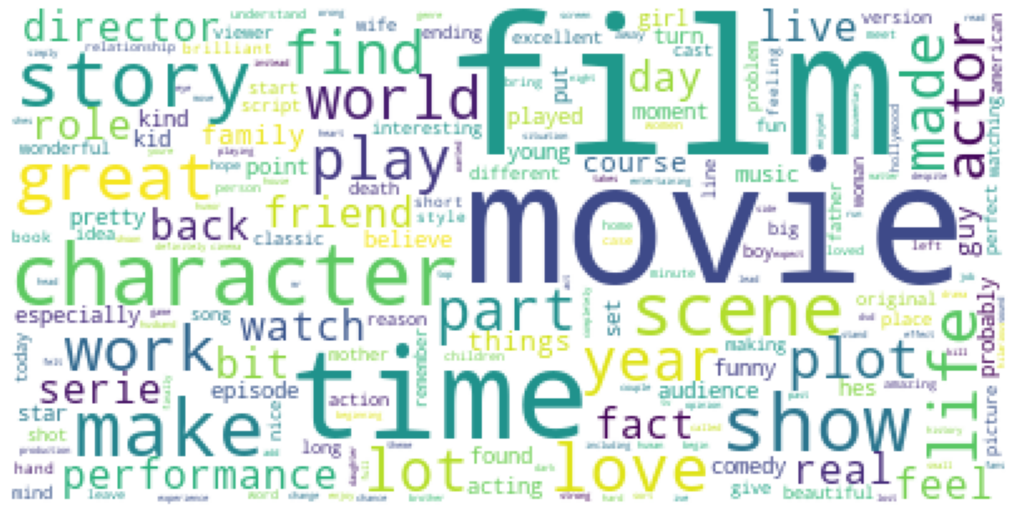

In [33]:
text_positive = " ".join(i for i in imdb_data[imdb_data['sentiment']==1]['review'])
create_cloud(text_positive)

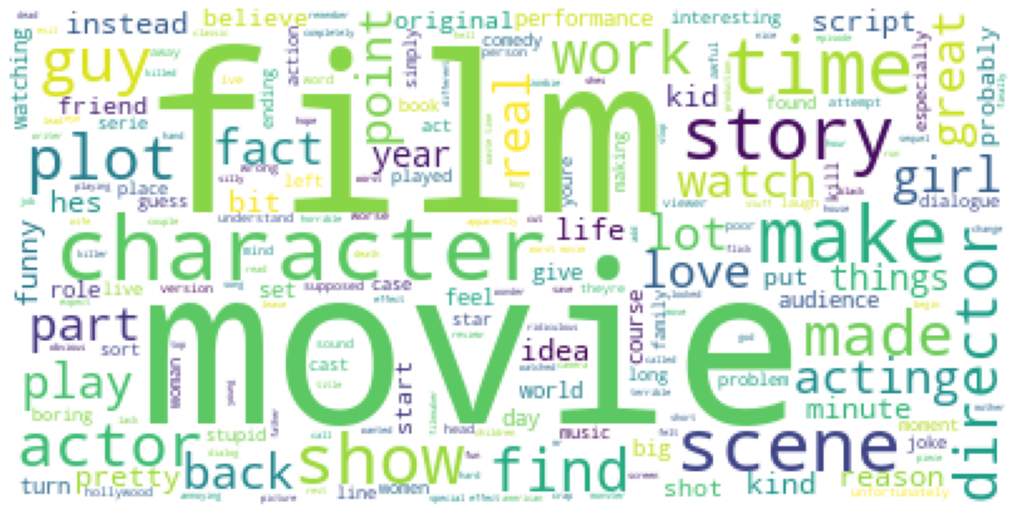

In [34]:
text_negative = " ".join(i for i in imdb_data[imdb_data['sentiment']==0]['review'])
create_cloud(text_negative)

Now I will use `sns.barplot()` for plotting most frequent 10 words in both negative and positive sentiments.

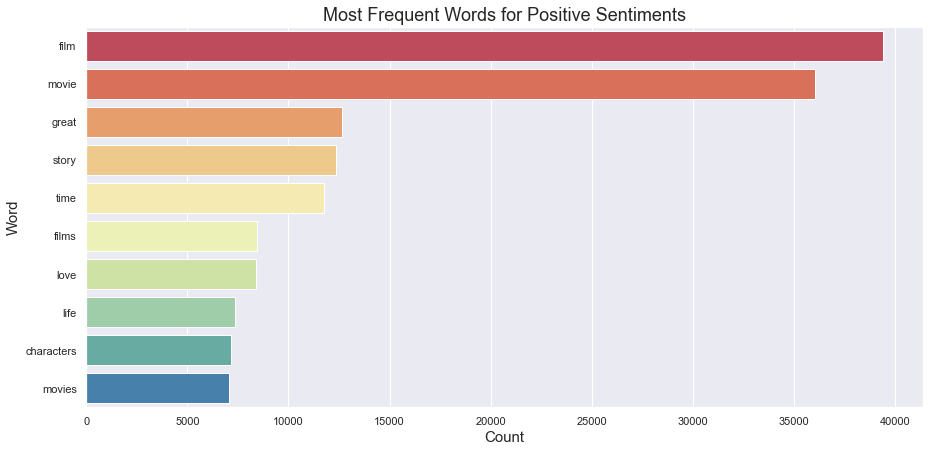

In [35]:
plot_counts(True) #Positive words

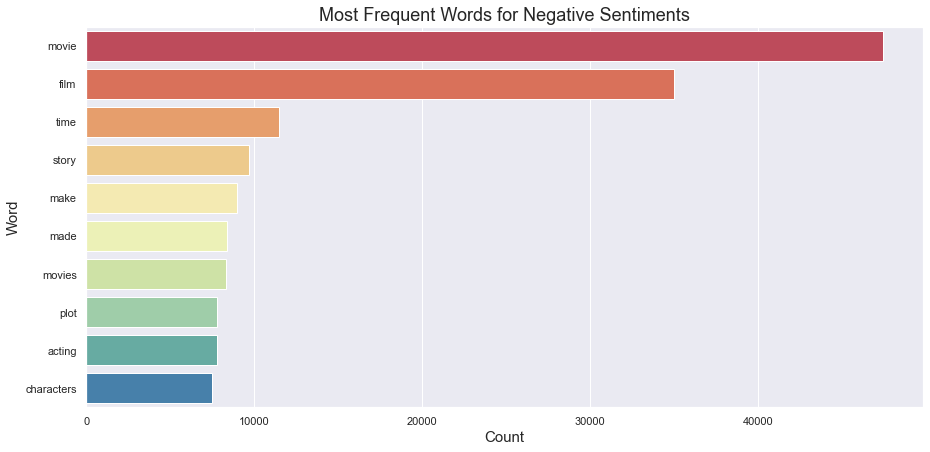

In [36]:
plot_counts(False) # Negative words

## Training the Naive Bayes Models

Let's use `RegexpTokenizer()` for tokenizing the text and then `CountVectorizer()` to create Bag-of-Words target.

In [37]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
bow = cv.fit_transform(imdb_data['review'])

In [38]:
X=bow
y=imdb_data['sentiment']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [40]:
mnb=MultinomialNB()
cnb=ComplementNB()
bnb = BernoulliNB()

In [41]:
model_mnb=mnb.fit(X_train,y_train)
model_cnb=cnb.fit(X_train,y_train)
model_bnb=bnb.fit(X_train,y_train)

In [42]:
mnb_predict=mnb.predict(X_test)
cnb_predict=cnb.predict(X_test)
bnb_predict=bnb.predict(X_test)

In [43]:
print('MultinomialNB accuracy score: {0:0.4f}'. format(accuracy_score(y_test, mnb_predict)))
print('ComplementNB accuracy score: {0:0.4f}'. format(accuracy_score(y_test, cnb_predict)))
print('BernoulliNB accuracy score: {0:0.4f}'. format(accuracy_score(y_test, bnb_predict)))

MultinomialNB accuracy score: 0.8646
ComplementNB accuracy score: 0.8646
BernoulliNB accuracy score: 0.8469


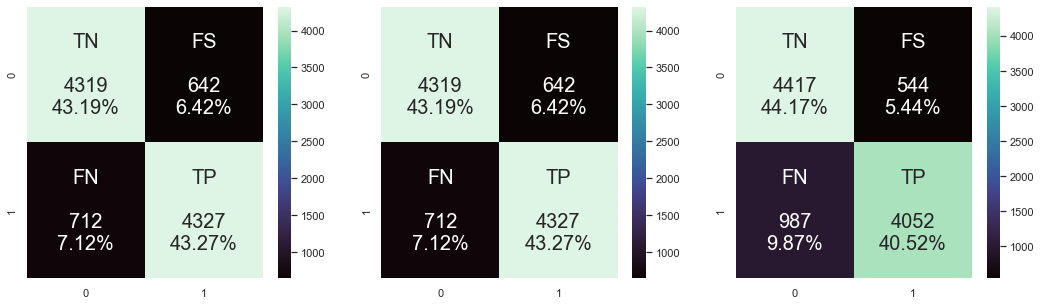

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [44]:
plot_confusion(y_test, [mnb_predict,cnb_predict,bnb_predict])

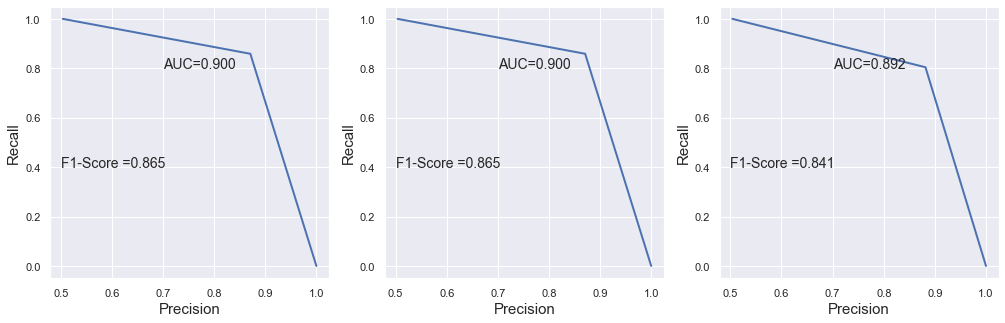

In [45]:
plot_precisionvsrecall(y_test, [mnb_predict,cnb_predict,bnb_predict])

We can again use `predict_proba` for improving model performance. Another option could be use these three model to build a voting classifier to see whether it would improve the performance, however, voting classifier is a concept that I will introduce later. So let's call it a day for today :)